In [2]:
# Imports for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import zscore # NEEDED TO NORMALIZE GDP
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Bureau of Transportation Statistics: Monthly Transportation Statistics

In [3]:
# Bureau of Transportation Statistics: Monthly Transportation Statistics
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
df_mts.head(10)

,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_mts.columns
# Notable columns:
# - Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - Highway Fatalities
# - Highway Vehicle Miles Traveled - All Systems
# - State and Local Government Construction Spending - Pavement
# - State and Local Government Construction Spending - Transportation
# - State and Local Government Construction Spending - Infrastructure
# - State and Local Government Construction Spending - Automotive
# - National Highway Construction Cost Index (NHCCI)
# - Highway Fuel Price - On-highway Diesel
# - Highway Fuel Price - Regular Gasoline
# - Unemployment Rate - Seasonally Adjusted
# - Labor Force Particpation - Seasonally Adjusted
# - Unemployed - Seasonally Adjusted
# - Heavy truck sales
# - Light truck sales
# - Auto sales
# - Auto sales SAAR (millions)
# 

Index(['Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       'Transit Ridership - Urban Rail - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-

# Google: Daily Community Mobility Data

In [5]:
# Google: Daily Community Mobility Data
df_camr = pd.read_csv('2020_Mobility_Report.csv')
df_camr

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812060,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-24,NaN,NaN,NaN,NaN,-56.0,NaN
812061,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-28,NaN,NaN,NaN,NaN,-40.0,NaN
812062,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-29,NaN,NaN,NaN,NaN,-43.0,NaN
812063,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-30,NaN,NaN,NaN,NaN,-40.0,NaN


In [6]:
for column in df_camr.columns:
    print(column)
# Notable columns:
# - transit_stations_percent_change_from_baseline
# - parks_percent_change_from_baseline
# - workpalces_percent_change_from_baseline
# - residential_percent_change_from_baseline

country_region_code
country_region
sub_region_1
sub_region_2
metro_area
iso_3166_2_code
census_fips_code
place_id
date
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


# Supplementary Data Sets

## [U.S. GDP 1960-2022 Annual](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product)

In [7]:
# US GDP 1960-2022
# Acquired from: https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
df_gdp_annual = pd.read_csv('usa_gdp_annual.csv')
df_gdp_annual

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1960-12-31,543.300000,3007.1234,NaN
1,1961-12-31,563.300000,3066.5629,2.3000
2,1962-12-31,605.100000,3243.8431,6.1000
3,1963-12-31,638.600000,3374.5152,4.4000
4,1964-12-31,685.800000,3573.9412,5.8000
...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557
58,2018-12-31,20527.156026,62805.2538,2.9189
59,2019-12-31,21372.572437,65094.7994,2.2889
60,2020-12-31,20893.743833,63027.6795,-3.4046


## [U.S. GDP Monthly 1960-2022](https://fred.stlouisfed.org/series/USALORSGPNOSTSAM)

In [8]:
# US GDP 1960-2022
# Acquired from: https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
df_gdp_monthly = pd.read_csv('usa_gdp_monthly.csv')
df_gdp_monthly

,DATE,USALORSGPNOSTSAM
0,1960-01-01,101.009477
1,1960-02-01,101.019803
2,1960-03-01,100.943976
3,1960-04-01,100.784465
4,1960-05-01,100.560223
...,...,...
747,2022-04-01,99.916264
748,2022-05-01,99.810129
749,2022-06-01,99.741208
750,2022-07-01,99.703565


# Begin EDA

In [9]:
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
# Determine column indices so that we can extract the columns we want
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)
# Notable columns:
# - 2 Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - 3 Highway Fatalities
# - 12 Highway Vehicle Miles Traveled - All Systems
### NOTE Total already exists: 82
# - 34 State and Local Government Construction Spending - Pavement
# - 45 State and Local Government Construction Spending - Transportation
# - 61 State and Local Government Construction Spending - Infrastructure
# - 76 State and Local Government Construction Spending - Automotive
# - 83 National Highway Construction Cost Index (NHCCI)
# - 84 Highway Fuel Price - On-highway Diesel
# - 85 Highway Fuel Price - Regular Gasoline
# - 95 Unemployment Rate - Seasonally Adjusted
# - 96 Labor Force Particpation - Seasonally Adjusted
# - 97 Unemployed - Seasonally Adjusted
# - 117 Heavy truck sales
# - 119 Light truck sales
# - 120 Auto sales
# - 129 Auto sales SAAR (millions)
# - 135 year ### ADDED

0 : Date
1 : Air Safety - General Aviation Fatalities
2 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
3 : Highway Fatalities
4 : U.S. Airline Traffic - Total - Seasonally Adjusted
5 : U.S. Airline Traffic - International - Seasonally Adjusted
6 : U.S. Airline Traffic - Domestic - Seasonally Adjusted
7 : Transit Ridership - Other Transit Modes - Adjusted
8 : Transit Ridership - Fixed Route Bus - Adjusted
9 : Transit Ridership - Urban Rail - Adjusted
10 : Freight Rail Intermodal Units
11 : Freight Rail Carloads
12 : Highway Vehicle Miles Traveled - All Systems
13 : Highway Vehicle Miles Traveled - Total Rural
14 : Highway Vehicle Miles Traveled - Other Rural
15 : Highway Vehicle Miles Traveled - Rural Other Arterial
16 : Highway Vehicle Miles Traveled - Rural Interstate
17 : State and Local Government Construction Spending - Breakwater/Jetty
18 : State and Local Government Construction Spending - Dam/Levee
19 : State and Local Government Construction Spending - Conservation

# Highway Vehicle Miles Traveled - All Systems (2018 - 2022)

In [10]:
df_mts = df_mts[~df_mts['Highway Vehicle Miles Traveled - All Systems'].isna()]
year = df_mts['Date'].str.extract(r'/(\d+)\s12', expand=False).astype(int)
df_mts['year'] = year
df_mts

#EDITED TO ADD MONTH COLUMN
df_mts['month'] = df_mts['Date'].str[:2]
df_mts

### NOTABLE COLUMNS FOR FEATURE? ###
df_mts_column_filter = df_mts.columns[[0, 2, 3, 12, 34, 45, 61, 76, 82, 83, 84, 85, 95, 96, 97, 117, 119, 120, 129, 135, 136]]
df_mts = df_mts[df_mts_column_filter].reset_index().drop('index', axis=1)


In [11]:
format_ = '%d/%m/%Y %H:%M:%S %p'
date_time = [datetime.strptime(df_mts['Date'][i], format_) for i in range(len(df_mts))]
dt = [str(date_time[i].day) + "/" + str(date_time[i].month) + "/" + str(date_time[i].year) for i in range(len(date_time))]
df_mts['Date'] = dt

In [12]:
df_mts
# Work on getting correlations for each feature with Highway Vehicle Miles
# plot neural networks

,Date,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,Highway Vehicle Miles Traveled - All Systems,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,National Highway Construction Cost Index (NHCCI),...,Highway Fuel Price - Regular Gasoline,Unemployment Rate - Seasonally Adjusted,Labor Force Participation Rate - Seasonally Adjusted,Unemployed - Seasonally Adjusted,Heavy truck sales,Light truck sales,Auto sales,Auto sales SAAR (millions),year,month
0,1/1/2018,1.10,8203.0,2.447360e+11,2.379000e+09,2.180000e+09,95000000.0,43000000.0,1.752800e+10,NaN,...,2.555,0.040,0.627,6505000.0,30700.0,785600.0,366400.0,5432000.0,2018,01
1,2/1/2018,NaN,NaN,2.277590e+11,2.410000e+09,2.290000e+09,97000000.0,53000000.0,1.782300e+10,NaN,...,2.587,0.041,0.630,6586000.0,34400.0,872400.0,422300.0,5443000.0,2018,02
2,3/1/2018,NaN,NaN,2.707050e+11,2.883000e+09,2.439000e+09,92000000.0,57000000.0,1.971900e+10,1.674676,...,2.591,0.040,0.629,6457000.0,40500.0,1110400.0,537600.0,5326000.0,2018,03
3,4/1/2018,1.11,9323.0,2.751270e+11,3.730000e+09,2.610000e+09,122000000.0,66000000.0,2.233700e+10,NaN,...,2.757,0.040,0.629,6448000.0,37700.0,925400.0,429100.0,5246000.0,2018,04
4,5/1/2018,NaN,NaN,2.837130e+11,5.047000e+09,2.783000e+09,117000000.0,84000000.0,2.542100e+10,NaN,...,2.901,0.038,0.629,6188000.0,40000.0,1073800.0,513700.0,5332000.0,2018,05
5,6/1/2018,NaN,NaN,2.826480e+11,6.062000e+09,2.978000e+09,139000000.0,86000000.0,2.826400e+10,1.752068,...,2.891,0.040,0.629,6446000.0,42900.0,1061100.0,483500.0,5193000.0,2018,06
6,7/1/2018,1.18,9934.0,2.909890e+11,6.644000e+09,3.153000e+09,160000000.0,88000000.0,2.931800e+10,NaN,...,2.849,0.038,0.629,6173000.0,40200.0,946600.0,417200.0,5153000.0,2018,07
7,8/1/2018,NaN,NaN,2.849890e+11,7.421000e+09,3.106000e+09,150000000.0,77000000.0,3.065500e+10,NaN,...,2.836,0.038,0.627,6167000.0,45200.0,1041800.0,441300.0,5060000.0,2018,08
8,9/1/2018,NaN,NaN,2.674340e+11,6.910000e+09,2.980000e+09,134000000.0,92000000.0,2.766300e+10,1.844641,...,2.836,0.037,0.627,6065000.0,42900.0,1002600.0,430300.0,5295000.0,2018,09
9,10/1/2018,1.15,9375.0,2.813820e+11,6.048000e+09,3.019000e+09,116000000.0,97000000.0,2.664200e+10,NaN,...,2.860,0.038,0.629,6230000.0,45600.0,940900.0,420400.0,5680000.0,2018,10


In [13]:
df_mts.columns

Index(['Date', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'year',
       'month'],
      dtype='object')

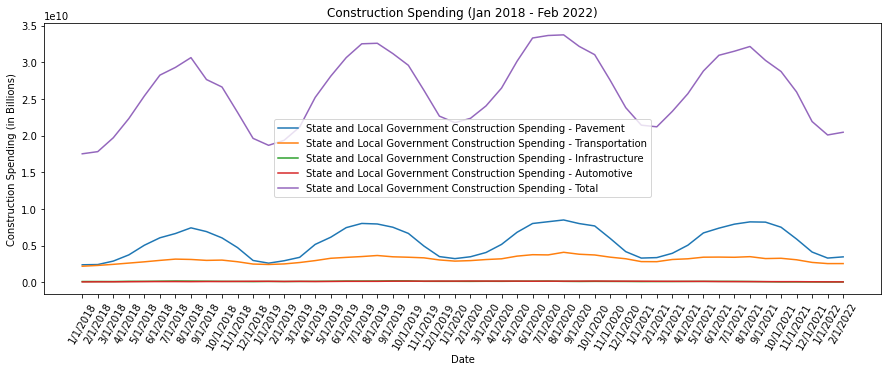

In [14]:
date_ = df_mts['Date']
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
# plt.plot(date_, df_mts['Highway Fuel Price - On-highway Diesel'], label='Highway Fuel Price - On-highway Diesel');
# plt.plot(date_, df_mts['Highway Fuel Price - Regular Gasoline'], label='Highway Fuel Price - Regular Gasoline');
plt.plot(date_, df_mts['State and Local Government Construction Spending - Pavement'], label='State and Local Government Construction Spending - Pavement');
plt.plot(date_, df_mts['State and Local Government Construction Spending - Transportation'], label='State and Local Government Construction Spending - Transportation');
plt.plot(date_, df_mts['State and Local Government Construction Spending - Infrastructure'], label='State and Local Government Construction Spending - Infrastructure');
plt.plot(date_, df_mts['State and Local Government Construction Spending - Automotive'], label='State and Local Government Construction Spending - Automotive');
plt.plot(date_, df_mts['State and Local Government Construction Spending - Total'], label='State and Local Government Construction Spending - Total');

# plt.plot(date_, df_mts['Highway Fatalities'], label='Highway Fatalities')
plt.title('Construction Spending (Jan 2018 - Feb 2022)')
plt.ylabel('Construction Spending (in Billions)')
plt.xlabel('Date')
plt.xticks(rotation=60);
plt.legend();
plt.show();

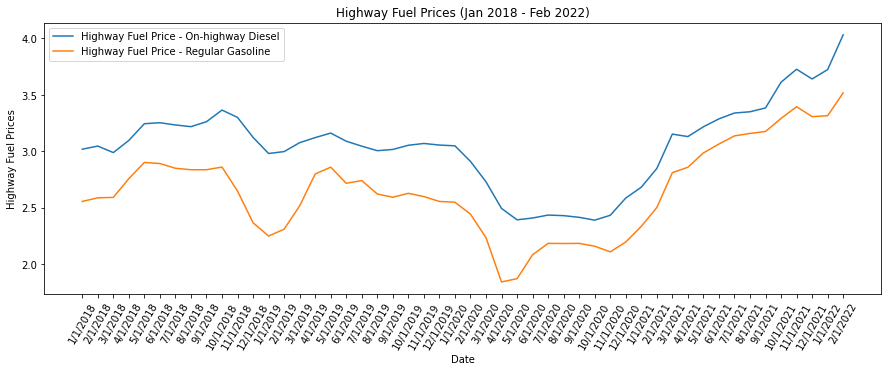

In [15]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(date_, df_mts['Highway Fuel Price - On-highway Diesel'], label='Highway Fuel Price - On-highway Diesel');
plt.plot(date_, df_mts['Highway Fuel Price - Regular Gasoline'], label='Highway Fuel Price - Regular Gasoline');

plt.title('Highway Fuel Prices (Jan 2018 - Feb 2022)')
plt.ylabel('Highway Fuel Prices')
plt.xlabel('Date')
plt.xticks(rotation=60);
plt.legend()
plt.show()

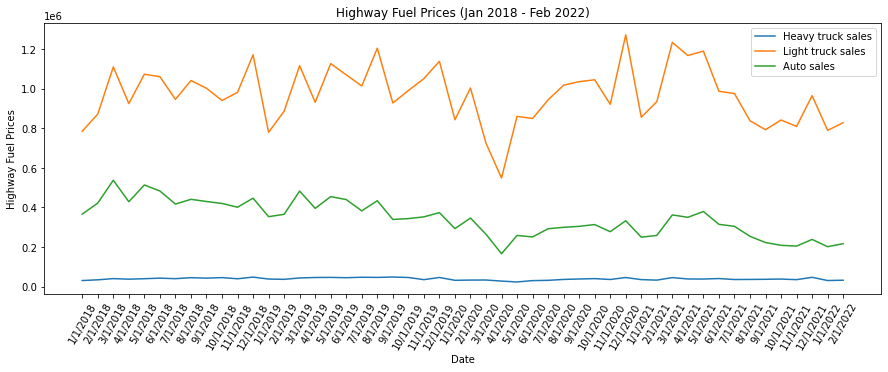

In [16]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(date_, df_mts['Heavy truck sales'], label='Heavy truck sales');
plt.plot(date_, df_mts['Light truck sales'], label='Light truck sales');
plt.plot(date_, df_mts['Auto sales'], label='Auto sales')

plt.title('Highway Fuel Prices (Jan 2018 - Feb 2022)')
plt.ylabel('Highway Fuel Prices')
plt.xlabel('Date')
plt.xticks(rotation=60);
plt.legend()
plt.show()

# Correlation With Highway Vehicle Miles Traveled

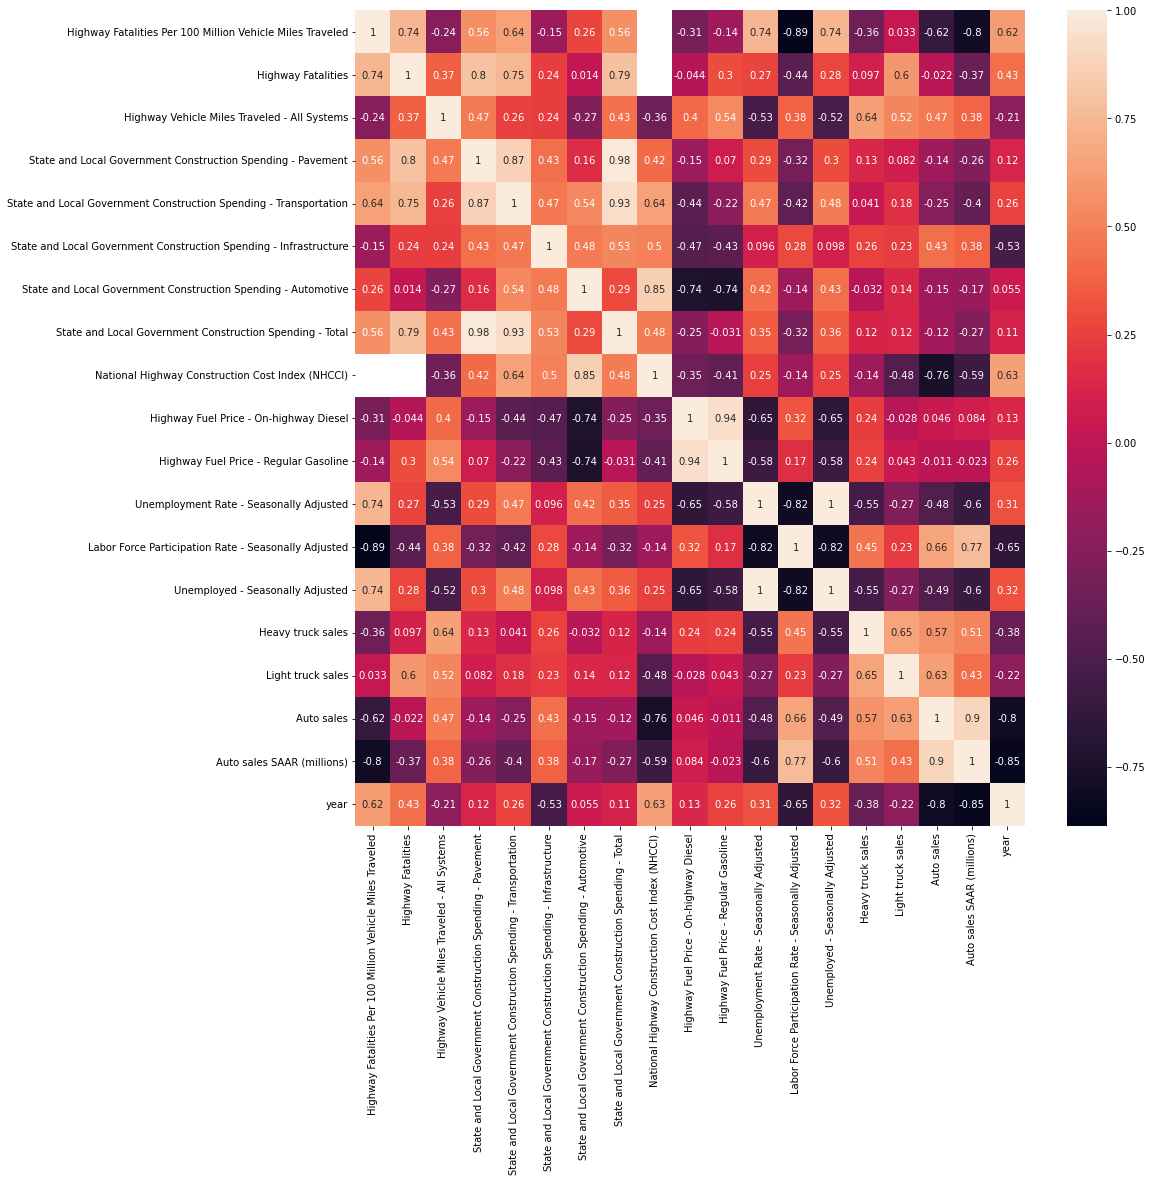

In [17]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)
sns.heatmap(df_mts.corr(),annot=True);

In [18]:
df_mts.corr()['Highway Vehicle Miles Traveled - All Systems']

Highway Fatalities Per 100 Million Vehicle Miles Traveled           -0.243978
Highway Fatalities                                                   0.368220
Highway Vehicle Miles Traveled - All Systems                         1.000000
State and Local Government Construction Spending - Pavement          0.473540
State and Local Government Construction Spending - Transportation    0.255053
State and Local Government Construction Spending - Infrastructure    0.235550
State and Local Government Construction Spending - Automotive       -0.265453
State and Local Government Construction Spending - Total             0.433267
National Highway Construction Cost Index (NHCCI)                    -0.355553
Highway Fuel Price - On-highway Diesel                               0.404185
Highway Fuel Price - Regular Gasoline                                0.538659
Unemployment Rate - Seasonally Adjusted                             -0.527060
Labor Force Participation Rate - Seasonally Adjusted            

In [19]:
df_mts.corr()['Highway Fatalities']

Highway Fatalities Per 100 Million Vehicle Miles Traveled            0.741423
Highway Fatalities                                                   1.000000
Highway Vehicle Miles Traveled - All Systems                         0.368220
State and Local Government Construction Spending - Pavement          0.797203
State and Local Government Construction Spending - Transportation    0.745260
State and Local Government Construction Spending - Infrastructure    0.240458
State and Local Government Construction Spending - Automotive        0.013776
State and Local Government Construction Spending - Total             0.790967
National Highway Construction Cost Index (NHCCI)                          NaN
Highway Fuel Price - On-highway Diesel                              -0.043910
Highway Fuel Price - Regular Gasoline                                0.298565
Unemployment Rate - Seasonally Adjusted                              0.270218
Labor Force Participation Rate - Seasonally Adjusted            

In [20]:
df_highway = df_mts.loc[:, [
    'Highway Vehicle Miles Traveled - All Systems',
    'State and Local Government Construction Spending - Pavement',
    'State and Local Government Construction Spending - Transportation',
    'State and Local Government Construction Spending - Infrastructure',
    'State and Local Government Construction Spending - Automotive',
    'State and Local Government Construction Spending - Total',
    'Highway Fuel Price - On-highway Diesel',
    'Highway Fuel Price - Regular Gasoline',
    'Heavy truck sales',
    'Light truck sales',
    'Auto sales'
]]

In [21]:
df_highway.head()

,Highway Vehicle Miles Traveled - All Systems,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,Highway Fuel Price - On-highway Diesel,Highway Fuel Price - Regular Gasoline,Heavy truck sales,Light truck sales,Auto sales
0,2.447360e+11,2.379000e+09,2.180000e+09,95000000.0,43000000.0,1.752800e+10,3.018,2.555,30700.0,785600.0,366400.0
1,2.277590e+11,2.410000e+09,2.290000e+09,97000000.0,53000000.0,1.782300e+10,3.046,2.587,34400.0,872400.0,422300.0
2,2.707050e+11,2.883000e+09,2.439000e+09,92000000.0,57000000.0,1.971900e+10,2.988,2.591,40500.0,1110400.0,537600.0
3,2.751270e+11,3.730000e+09,2.610000e+09,122000000.0,66000000.0,2.233700e+10,3.096,2.757,37700.0,925400.0,429100.0
4,2.837130e+11,5.047000e+09,2.783000e+09,117000000.0,84000000.0,2.542100e+10,3.244,2.901,40000.0,1073800.0,513700.0


# DecisionTreeClassifier

In [25]:
X = df_highway.loc[:, 'State and Local Government Construction Spending - Pavement':]

### Preprocess Response Variable -> convert Continous values to Categorical Values (LabelEncoder) ###
### Members -> # of unique classes in y -> use another converter? ###

y = df_highway['Highway Vehicle Miles Traveled - All Systems']
lab = preprocessing.LabelEncoder()
n_bins=5
y_transformed = lab.fit_transform(pd.cut(y, n_bins, retbins=True)[0])
max_depth = 14
cols = X.columns
weights_to_col_total = dict(zip(cols, np.ones((len(cols), max_depth))))
weights_to_col_total['Cross Validation Accuracy'] = np.ones(max_depth)

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, random_state = 0)
for i in range(max_depth):
    clf = DecisionTreeClassifier(random_state=42, max_depth = i + 1)
    clf.fit(X, y_transformed)
    weights = list(clf.feature_importances_.astype(str))
    col_to_weight = dict(zip(cols, weights))
    for column in cols:
        weights_to_col_total[column][i] = (col_to_weight[column])
    weights_to_col_total["Cross Validation Accuracy"][i] = np.mean(cross_val_score(clf, X, y_transformed, cv=20))

In [38]:
decision_tree = pd.DataFrame(weights_to_col_total)

In [39]:
decision_tree

,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,Highway Fuel Price - On-highway Diesel,Highway Fuel Price - Regular Gasoline,Heavy truck sales,Light truck sales,Auto sales,Cross Validation Accuracy
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.366667
1,0.225155,0.000000,0.000000,0.0,0.000000,0.000000,0.301242,0.473602,0.000000,0.000000,0.400000
2,0.143064,0.000000,0.196866,0.0,0.000000,0.088799,0.191410,0.300929,0.078932,0.000000,0.525000
3,0.100385,0.000000,0.083077,0.0,0.083077,0.221403,0.190462,0.211154,0.055385,0.055059,0.483333
4,0.092751,0.000000,0.152506,0.0,0.076759,0.117537,0.175977,0.333297,0.051173,0.000000,0.483333
5,0.086310,0.071429,0.094577,0.0,0.071429,0.196312,0.203439,0.181548,0.047619,0.047339,0.491667
6,0.086310,0.071429,0.094577,0.0,0.071429,0.196312,0.203439,0.181548,0.047619,0.047339,0.533333
7,0.086310,0.071429,0.094577,0.0,0.071429,0.196312,0.203439,0.181548,0.047619,0.047339,0.533333
8,0.086310,0.071429,0.094577,0.0,0.071429,0.196312,0.203439,0.181548,0.047619,0.047339,0.533333
9,0.086310,0.071429,0.094577,0.0,0.071429,0.196312,0.203439,0.181548,0.047619,0.047339,0.533333


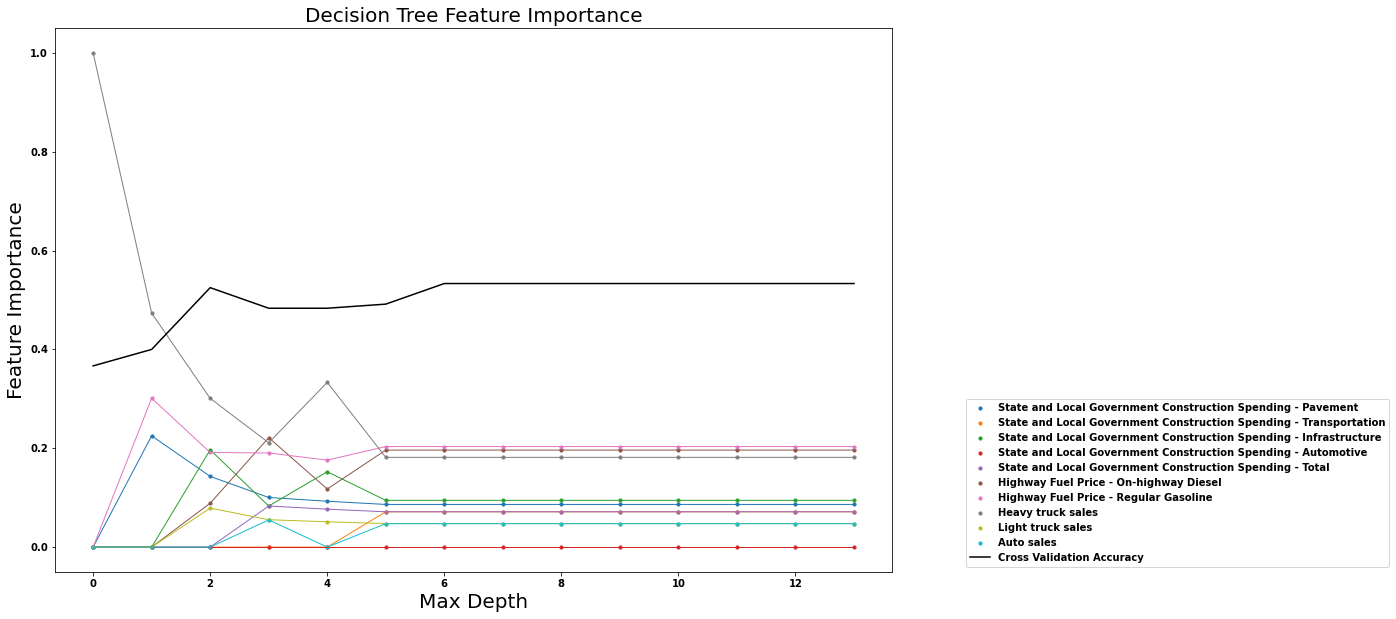

In [40]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.rc('axes', titlesize=20)  
plt.rc('axes', labelsize=20) 
for col in decision_tree.columns:
    if col == "Cross Validation Accuracy":
        plt.plot(decision_tree.index, decision_tree["Cross Validation Accuracy"], color = 'black', label = "Cross Validation Accuracy")
    else:
        plt.scatter(x=decision_tree[col].index, y=decision_tree[col], label=col, s=10);
        plt.plot(decision_tree[col].index, decision_tree[col], lw=1)
plt.legend(bbox_to_anchor=(1.6, 0), loc = 4);
plt.title("Decision Tree Feature Importance");
plt.xlabel('Max Depth');
plt.ylabel('Feature Importance');

In [79]:
# Begin connecting above df with df_gdp (U.S. GDP 1960-2022 dataset)
# Preprocessing on 'date' column of df_gdp
df_gdp_year = df_gdp_annual['date'].str.extract('(\d+)-', expand=False)
df_gdp_annual['year'] = df_gdp_year.astype(int)
df_gdp_annual


,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,year
0,1960-12-31,543.300000,3007.1234,NaN,1960
1,1961-12-31,563.300000,3066.5629,2.3000,1961
2,1962-12-31,605.100000,3243.8431,6.1000,1962
3,1963-12-31,638.600000,3374.5152,4.4000,1963
4,1964-12-31,685.800000,3573.9412,5.8000,1964
...,...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557,2017
58,2018-12-31,20527.156026,62805.2538,2.9189,2018
59,2019-12-31,21372.572437,65094.7994,2.2889,2019
60,2020-12-31,20893.743833,63027.6795,-3.4046,2020


In [80]:
df_mts_grouped_year = df_mts.groupby('year').sum()
df_mts_gdp = df_mts_grouped_year.merge(df_gdp_annual, how='left', left_on='year', right_on='year')
df_mts_gdp.columns

Index(['year', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'date',
       ' GDP ( Billions of US $)', ' Per Capita (US $)', ' Annual % Chang

In [81]:
df_mts_gdp

,year,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,Highway Vehicle Miles Traveled - All Systems,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,National Highway Construction Cost Index (NHCCI),...,Labor Force Participation Rate - Seasonally Adjusted,Unemployed - Seasonally Adjusted,Heavy truck sales,Light truck sales,Auto sales,Auto sales SAAR (millions),date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,2018,4.54,36835.0,3.240325e+12,5.722600e+10,3.281100e+10,1.408000e+09,9.800000e+08,2.881900e+11,7.144428,...,7.544,75776000.0,487900.0,11914500.0,5310200.0,63724000.0,2018-12-31,20527.156026,62805.2538,2.9189
1,2019,4.46,36096.0,3.259890e+12,6.624600e+10,3.759800e+10,1.624000e+09,1.485000e+09,3.180700e+11,7.698591,...,7.571,71999000.0,527000.0,12241200.0,4719800.0,56638000.0,2019-12-31,21372.572437,65094.7994,2.2889
2,2020,5.35,38680.0,2.903621e+12,7.331800e+10,4.139600e+10,1.458000e+09,1.788000e+09,3.402430e+11,7.687858,...,7.411,155387000.0,409500.0,11069900.0,3401800.0,40825000.0,2020-12-31,20893.743833,63027.6795,-3.4046
3,2021,5.31,31720.0,3.228126e+12,7.163100e+10,3.790200e+10,1.019000e+09,1.161000e+09,3.221440e+11,0.000000,...,7.399,103507000.0,461400.0,11596900.0,3350100.0,40200000.0,2021-12-31,22996.100000,69287.5366,5.6711
4,2022,1.27,0.0,4.762080e+11,6.754000e+09,5.084000e+09,7.200000e+07,9.600000e+07,4.056500e+10,0.000000,...,1.245,12783000.0,63100.0,1618400.0,418900.0,5861000.0,NaN,NaN,NaN,NaN
